In [8]:
import math
# from autograd import jacobian
from numpy import genfromtxt
import scipy
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import cm
from scipy.optimize import Bounds
from mpl_toolkits.mplot3d import Axes3D
#matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family ='Arial',size=7)
#from palettable.colorbrewer.sequential import Blues_8
#colors = Blues_8.mpl_colormap(np.linspace(0,6))
import pandas as pd
import numpy as np
from scipy.stats import kstest
from scipy.stats import ks_2samp
import random
# import numpyro
# import numpyro.distributions as dist
import seaborn as sns

In [9]:
from pandas import *

In [10]:
Hist = ExcelFile('/Coherency_PSF_pig6.xlsx')
df = Hist.parse(Hist.sheet_names[5])
HistD=df.to_dict()
print (Hist.sheet_names[5])

Pig3_6


In [11]:
## initialize 

ctrl=[]
# te=[]
xrt=[]
xrtte=[]

for i in range(len(HistD['group'])):
    if HistD['group'][i]=='ctrl'and HistD['cons'][i]==0 and HistD['loc'][i]==1:
        ctrl.append(HistD['coh_values'][i])
    # elif HistD['group'][i]=='te':
    #     te.append(HistD['coh_values'][i])
    elif HistD['group'][i]=='xrte'and HistD['cons'][i]==0 and HistD['loc'][i]==1:
        xrtte.append(HistD['coh_values'][i])
    elif HistD['group'][i]=='xr'and HistD['cons'][i]==0 and HistD['loc'][i]==1:
        xrt.append(HistD['coh_values'][i])

# ctrl = HistD['coherency_value',HistD['group']=='ctrl']
# print(ctrl)

In [12]:
def stde(data):
    return np.std(data, ddof=1) / np.sqrt(np.size(data))

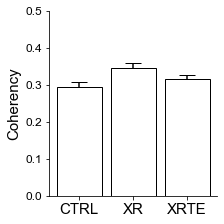

In [13]:


CTRLglX = [np.mean(ctrl)]
CTRLeglX=[stde(ctrl)]
# apexglX = [np.mean(te)]
# apexeglX = [stde(te)]
peripheryglX = [np.mean(xrt)]
peripheryeglX = [stde(xrt)]
middleglX = [np.mean(xrtte)]
middleeglX = [stde(xrtte)]

barWidth = 0.050
locspace=0.06

br11 = np.arange(len(CTRLglX))
br22 = [x + locspace for x in br11]
br33 = [x + locspace for x in br22]
br44 = [x + locspace for x in br33]

# plt.figure(figsize=(2.5,2.5))
fig,axx = plt.subplots(1,1,figsize = (3, 3), 
                      constrained_layout=True
                     )

plt.bar(br11, CTRLglX, color ='1', width = barWidth, edgecolor ='0',
                yerr = ([0],CTRLeglX),capsize=8,ecolor='0', label ='CTRL')
# plt.bar(br22, apexglX, color ='0', width = barWidth, edgecolor ='0',
#                 yerr = (apexeglX),capsize=4,ecolor='0', label ='TE')
plt.bar(br22, peripheryglX, color ='1', width = barWidth, edgecolor ='0',
               yerr = ([0],peripheryeglX),capsize=8,ecolor='0', label ='XR')
plt.bar(br33, middleglX, color ='1', width = barWidth, edgecolor ='0',
                yerr = ([0],middleeglX),capsize=8,ecolor='0', label ='XRT')


axx = plt.gca()
# ax.legend(loc=1, fontsize=12)
axx.spines['right'].set_visible(False)
axx.spines['top'].set_visible(False)
# ax.get_xaxis().set_visible(False)
axx.set_ylim(0,0.5)
axx.set_xticks([br11[0],br22[0],br33[0]],['CTRL','XR','XRTE'], fontsize=15)

axx.set_ylabel('Coherency', fontsize = 15)
plt.yticks(fontsize=12)
# ax.legend(loc=2, fontsize=12)
plt.savefig("coherencybars_loc1.png",dpi=300)